In [72]:


# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('C:\\Users\\Admin\\Desktop\\sentiment analysis\\twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [73]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [74]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [75]:
# basic feature extraction | 
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)

In [76]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

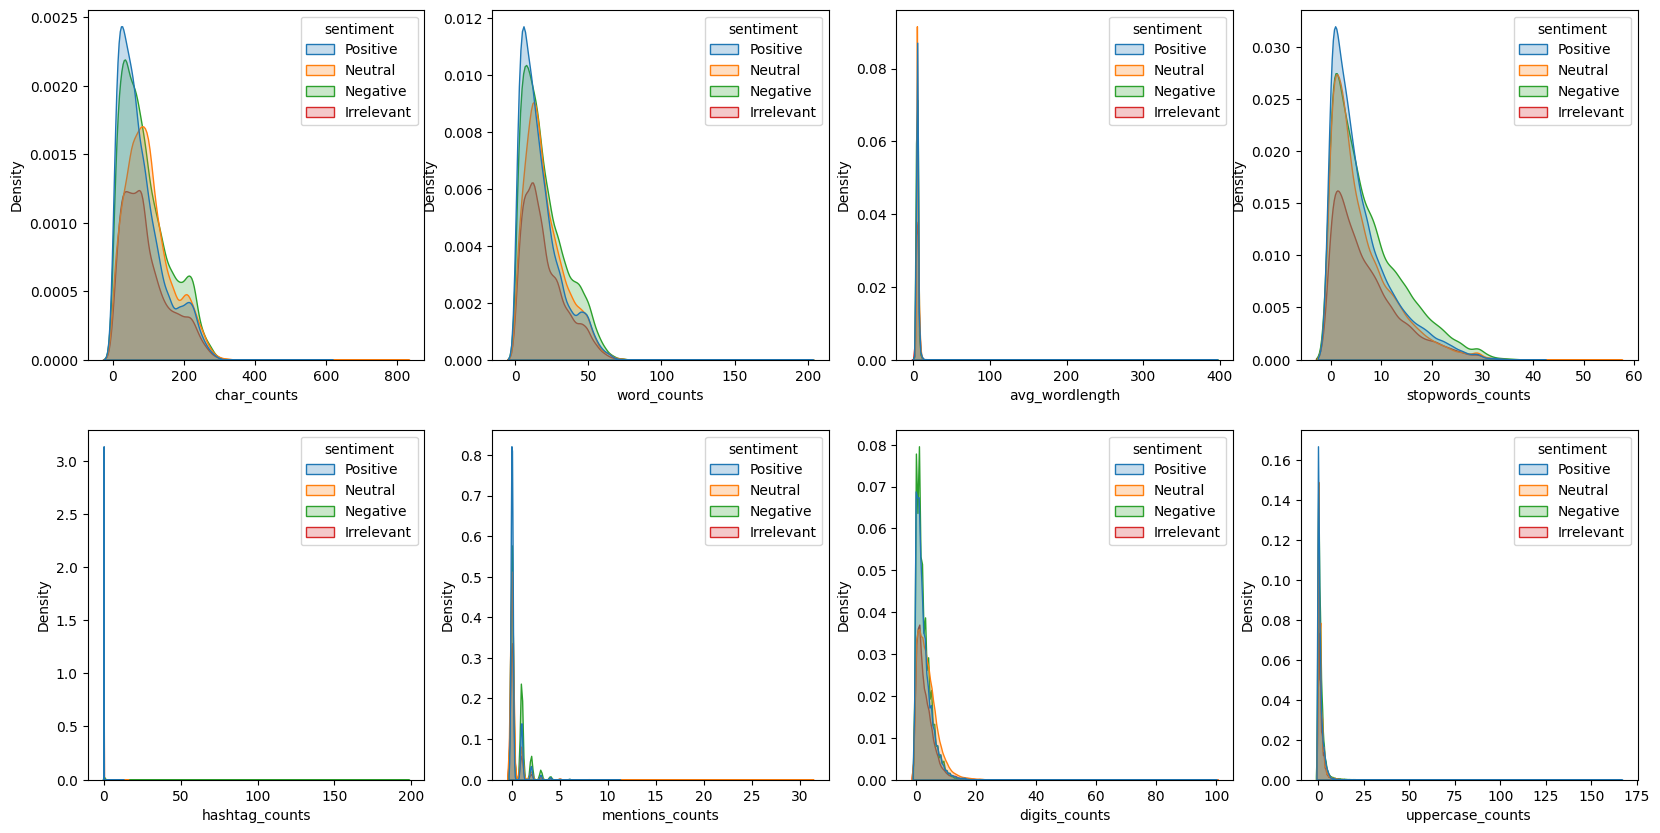

In [77]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

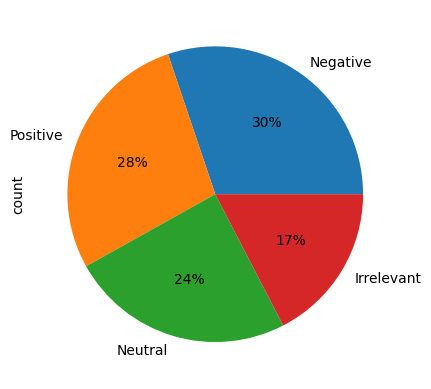

In [78]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

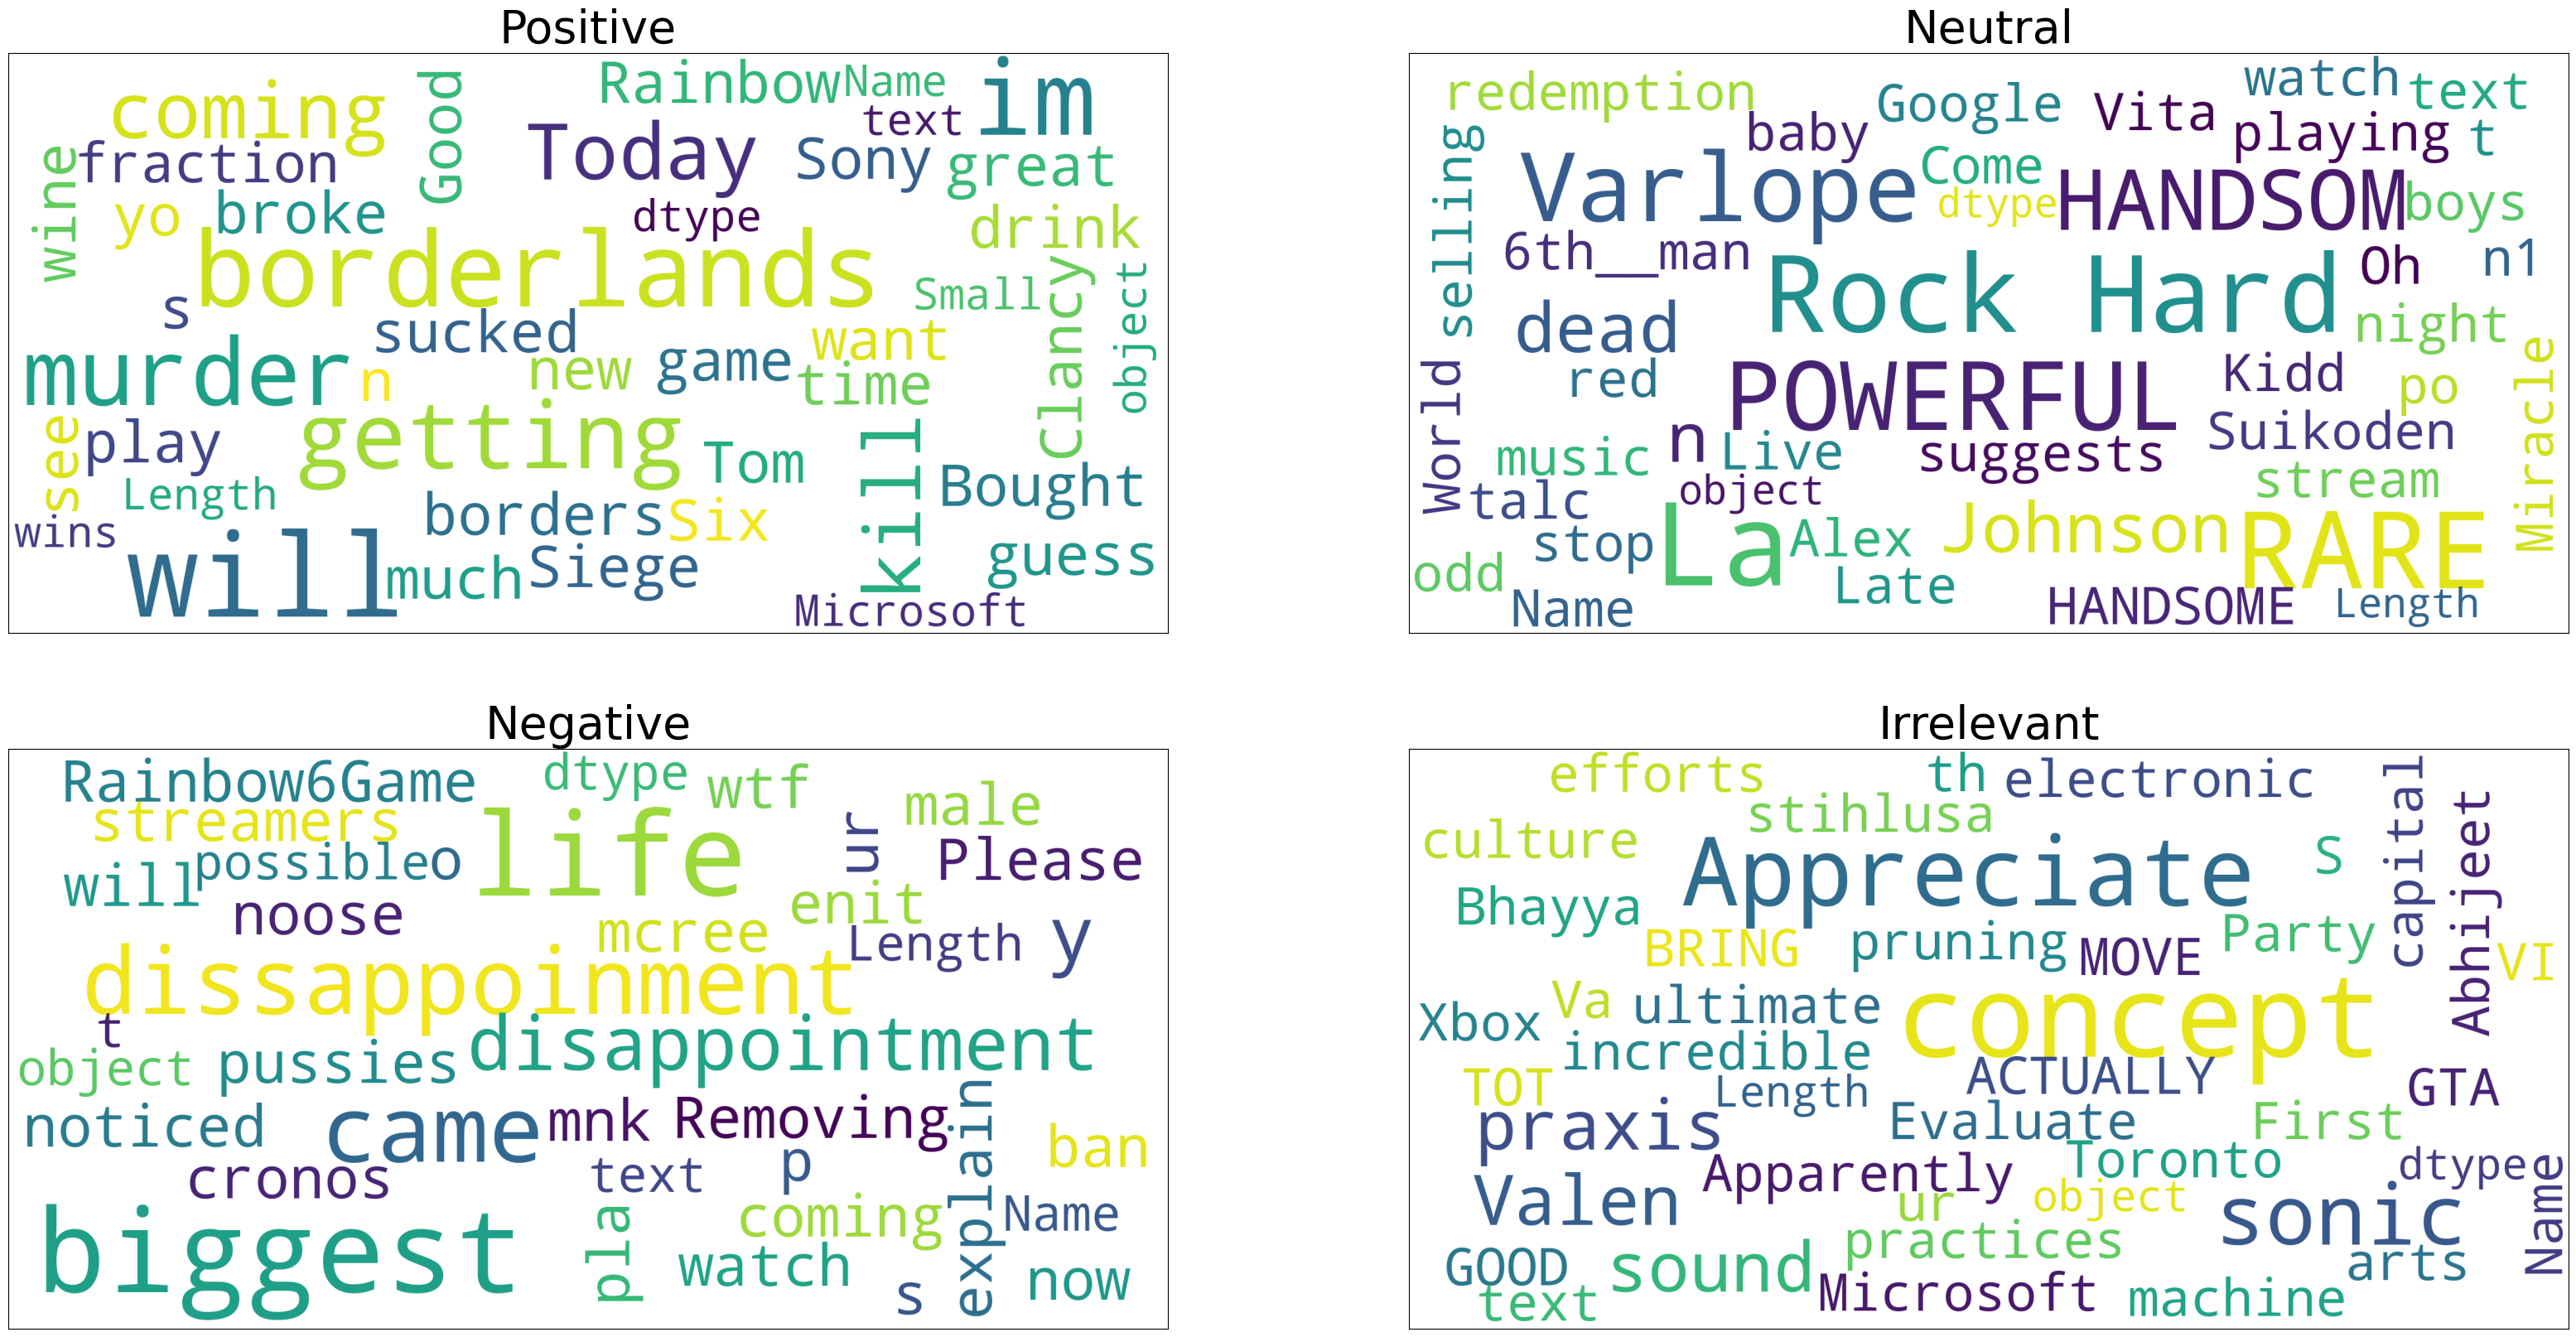

<Figure size 640x480 with 0 Axes>

In [79]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [80]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [81]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [82]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [83]:
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [84]:
stop_words_list = ['a', 'an', 'the', ...]  # your custom list of stop words
clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words_list)), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [85]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'an', 'the', Ellipsis])),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [86]:
# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9244474212993972


In [87]:
# save model
import pickle

pickle.dump(clf, open('C:\\Users\\Admin\\Desktop\\sentiment analysis\\twitter_sentiment.pkl', 'wb'))

In [88]:
X_test.tolist()[:20]

["Add 4 @ CallofDuty and in @ RogueCompany Now teams. O and everyone plays under @ play _ pso2 or @ GhostRecon. I am also one of the BEST Grovers in @ PaladinsGame and BEST Junkrat or McCree in @ overwatchleague. Don't forget BEST Vulcan in @ SMITEGame. I play @ DestinyTheGame and @ FortniteGame.",
 '@TMobile... you guys kids are really very slow in Tuba Star city. Az. Makes people go to Google Verizon.',
 'I will make Google top ranking high quality SEO backlinks. Fiverr.com / share / NWeWvp..',
 'I know a guy who’s tablet crashes today after 10 years. He tried to fix it without google videos and plugging the tv into a different outlet. No luck.',
 '@ EAMaddenNFL movement is incredible.',
 '. Internship manager.',
 'BGs – NOT IN FIRST! by Hearthstone\xa0Battlegrounds gameforce.jp/hearthstone%e3…',
 'Almost 2 years after launch and 3 cancelled season later BFV still now have game same in MP even though it’s fully functional in Ghost Campaign... touche beyond every wire putting one nail